In [2]:
# Import Data from QIIME2
# Find a way to do this that is consistent across all notebooks/all group members?

In [11]:
# Import Packages
import pandas as pd
import numpy as np

from skbio.stats.distance import DistanceMatrix

In [24]:
# Which distance metrics are we interested in computing and how do I do that? Could build functions to compute OR
# QIIME2 does this with their diversity library

# 1. Bray Curtis
# 2. Unweighted Unifrac
# 3. Weighted Unifrac

# Any additional ones to focus on?

In [14]:
# Random tutorial on visualizing similarities?
sample_ids = ['A', 'B', 'C', 'D', 'E', 'F']
_columns = ['body site', 'individual']
_md = [['gut', 'subject 1'],
       ['gut', 'subject 2'],
       ['tongue', 'subject 1'],
       ['tongue', 'subject 2'],
       ['skin', 'subject 1'],
       ['skin', 'subject 2']]

human_microbiome_sample_md = pd.DataFrame(_md, index=sample_ids, columns=_columns)
human_microbiome_sample_md

,body site,individual
A,gut,subject 1
B,gut,subject 2
C,tongue,subject 1
D,tongue,subject 2
E,skin,subject 1
F,skin,subject 2


In [15]:
dm_data = np.array([[0.00, 0.35, 0.83, 0.83, 0.90, 0.90],
                 [0.35, 0.00, 0.86, 0.85, 0.92, 0.91],
                 [0.83, 0.86, 0.00, 0.25, 0.88, 0.87],
                 [0.83, 0.85, 0.25, 0.00, 0.88, 0.88],
                 [0.90, 0.92, 0.88, 0.88, 0.00, 0.50],
                 [0.90, 0.91, 0.87, 0.88, 0.50, 0.00]])

human_microbiome_dm = DistanceMatrix(dm_data, sample_ids)
print(human_microbiome_dm)

6x6 distance matrix
IDs:
'A', 'B', 'C', 'D', 'E', 'F'
Data:
[[0.   0.35 0.83 0.83 0.9  0.9 ]
 [0.35 0.   0.86 0.85 0.92 0.91]
 [0.83 0.86 0.   0.25 0.88 0.87]
 [0.83 0.85 0.25 0.   0.88 0.88]
 [0.9  0.92 0.88 0.88 0.   0.5 ]
 [0.9  0.91 0.87 0.88 0.5  0.  ]]


In [16]:
def within_between_category_distributions(dm, md, md_category):
    within_category_distances = []
    between_category_distances = []
    for i, sample_id1 in enumerate(dm.ids):
        sample_md1 = md[md_category][sample_id1]
        for sample_id2 in dm.ids[:i]:
            sample_md2 = md[md_category][sample_id2]
            if sample_md1 == sample_md2:
                within_category_distances.append(dm[sample_id1, sample_id2])
            else:
                between_category_distances.append(dm[sample_id1, sample_id2])
    return within_category_distances, between_category_distances


In [17]:
within_category_distances, between_category_distances = within_between_category_distributions(human_microbiome_dm, human_microbiome_sample_md, "body site")
print(within_category_distances)
print(between_category_distances)

[0.35, 0.25, 0.5]
[0.83, 0.86, 0.83, 0.85, 0.9, 0.92, 0.88, 0.88, 0.9, 0.91, 0.87, 0.88]


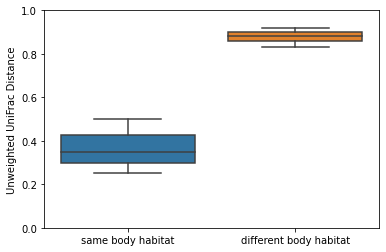

In [18]:
import seaborn as sns
ax = sns.boxplot(data=[within_category_distances, between_category_distances])
ax.set_xticklabels(['same body habitat', 'different body habitat'])
ax.set_ylabel('Unweighted UniFrac Distance')
_ = ax.set_ylim(0.0, 1.0)

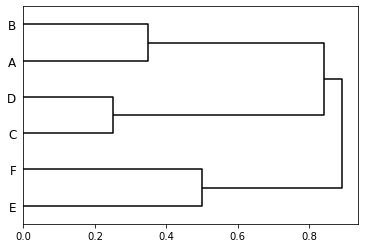

In [19]:
from scipy.cluster.hierarchy import average, dendrogram
lm = average(human_microbiome_dm.condensed_form())
d = dendrogram(lm, labels=human_microbiome_dm.ids, orientation='right',
               link_color_func=lambda x: 'black')

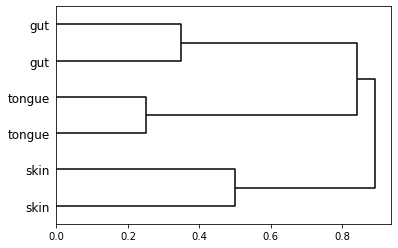

In [20]:
labels = [human_microbiome_sample_md['body site'][sid] for sid in sample_ids]
d = dendrogram(lm, labels=labels, orientation='right',
               link_color_func=lambda x: 'black')

In [23]:
# PCOA: reduces the dimensionality of the DistanceMatrix to make it easier to visualize
from skbio.stats.ordination import pcoa

In [ ]:
# run pcoa on distance matrix then plot using cmap
# Need a metric to cluster based on -- what does similarity/dissimilarity depend on here? (Latitude, pH, etc.)
# How do we input this to the python package?
# Metric to show how good of a choice your clustering metric was?
from scipy.stats import spearmanr
spearman_rho, spearman_p = spearmanr(lauber_soil_unweighted_unifrac_pc.samples['PC1'],
                                     lauber_soil_sample_md['Latitude'][lauber_soil_unweighted_unifrac_pc.samples.index])
print('rho: %1.3f' % spearman_rho)
print('p-value: %1.1e' % spearman_p)

In [ ]:
# Mantel test--looks at the correlation between distance matrices (bray curtis v. unifrac etc.)